In [44]:
import pandas as pd

df = pd.read_csv(
    "C:/Users/auste/4 Kursas/Naturali kalba/features_fake_true_data.csv", index_col=0
)

In [45]:
df.head()

,text,subject,date,label,word_count,stopword_count,punct_count,wierd_symbols_count,ent_count,processed_text,...,title_sentiment,title_subjectivity,people_ent,organizations_ent,country_mention_count,mentioned_countries,people_count,organizations_count,filtered_countries,filtered_country_count
title,,,,,,,,,,,,,,,,,,,,,
Senator McConnell: Saudi bill may have unintended consequences,"WASHINGTON (Reuters) - U.S. Senate Majority Leader Mitch McConnell said on Thursday there could be unintended consequences from legislation allowing relatives of Sept. 11 victims to sue Saudi Arabia. “It appears there may be some unintended ramification of that (the law) and I do think it is worth further discussing,” Republican McConnell told reporters. Congress on Wednesday overwhelmingly rejected President Barack Obama’s veto of the legislation.",politicsNews,"September 29, 2016",1,66,25,11,4,12,WASHINGTON Reuters U.S. Senate Majority Leader Mitch McConnell said Thursday unintended consequences legislation allowing relatives Sept. 11 victims sue Saudi Arabia appears unintended ramification law think worth discussing Republican McConnell told reporters Congress Wednesday overwhelmingly rejected President Barack Obama veto legislation,...,0.0,0.0,"['Mitch McConnell', 'McConnell', 'Barack Obama']","['Reuters', 'Senate', 'Congress']",1,['Saudi Arabia'],3,3,['Saudi Arabia'],1
BREAKING: TEXAS COP STABBED 14 TIMES By Man Who “had a desire to kill a police officer”,"Who knew that in our First Black President s second term killing cops would be all the rage in the black community? A Houston Community College police officer has survived an assassination attempt after being stabbed by her assailant 14 times. The officer was saved by civilians who stepped in and stopped the attacker. The attacker told investigators he did this to get back at police for their brutality. A spokesman from the family said it might be related to the Baltimore riots.Officer April Pikes remains in critical condition at Houston s Ben Taub Hospital, a public relations official at the Houston Police Department said to Breitbart Texas. Her alleged attacker, Jeremiah M. Matthews, 23, was pulled off of her by a group of men while he was stabbing her and attempting to grab her pistol, according to a statement from HPD obtained by Breitbart Texas.Harris County prosecutors said that Matthews told them he had the intent to attack a police officer and his desire to kill a police officer, according to a Click2Houston.com report. One of the witnesses, Abe Baker, who helped stop the attack said, I saw him on her, just stabbing her. I wasn t really thinking, Baker said. His arm was just up getting ready to stab her and I just grabbed his arm and took him down, and that s when everybody else came over and we all just took him down. The HPD statement revealed that Matthews stabbed her several times before he was tackled and disarmed. The statement says he was attempting to gain control of her duty weapon. After taking down the suspect, the good Samaritans used the officer s handcuffs to detain Matthews until other police officers arrived and arrested him.The Click2Houston report states that Pike may lose her right arm. She was stabbed repeatedly in her right arm and torso.The scene of the attack was a Walmart located in Meyerland (Southwest Houston), where Pikes was working an approved off-duty security job. Pikes was in uniform when she was attacked. He was in an upbeat mood, whistling and he had a fast pace, walking fast, Baker said of the assailant, who was smiling and cheerful right up until the moment he began his surprise attack. He does have a diagnostic history of mental illness in the past. To what degree that played into what happened, we don t know, local community activist Deric Muhammad said, speaking on behalf of the Matthews family. He said it is possible that Matthews was inspired by the riots in Baltimore Monday night.The weapon was described as a hunting knife in a report by Fox26H

In [46]:
print(df.columns)

Index(['text', 'subject', 'date', 'label', 'word_count', 'stopword_count',
       'punct_count', 'wierd_symbols_count', 'ent_count', 'processed_text',
       'stopwords_ratio', 'punct_ratio', 'lexical_richness', 'sentiment',
       'subjectivity', 'hashtags', 'mentions', 'urls', 'hashtag_count',
       'mention_count', 'url_count', 'has_hashtags', 'has_mentions',
       'has_urls', 'title_lexical_richness', 'title_sentiment',
       'title_subjectivity', 'people_ent', 'organizations_ent',
       'country_mention_count', 'mentioned_countries', 'people_count',
       'organizations_count', 'filtered_countries', 'filtered_country_count'],
      dtype='object')


                           label  word_count  stopword_count  punct_count  \
label                   1.000000   -0.070182       -0.114563    -0.026634   
word_count             -0.070182    1.000000        0.988237     0.952611   
stopword_count         -0.114563    0.988237        1.000000     0.934374   
punct_count            -0.026634    0.952611        0.934374     1.000000   
wierd_symbols_count     0.561312    0.073045        0.056208     0.162316   
ent_count               0.086561    0.900281        0.851964     0.882307   
stopwords_ratio        -0.341643    0.193976        0.281695     0.150598   
punct_ratio             0.129529   -0.058068       -0.070320     0.116883   
lexical_richness       -0.046029   -0.401990       -0.387392    -0.404910   
sentiment              -0.035369    0.001780        0.009351     0.013340   
subjectivity           -0.335646    0.082004        0.110318     0.090097   
has_hashtags           -0.236749    0.068525        0.059913     0.126454   

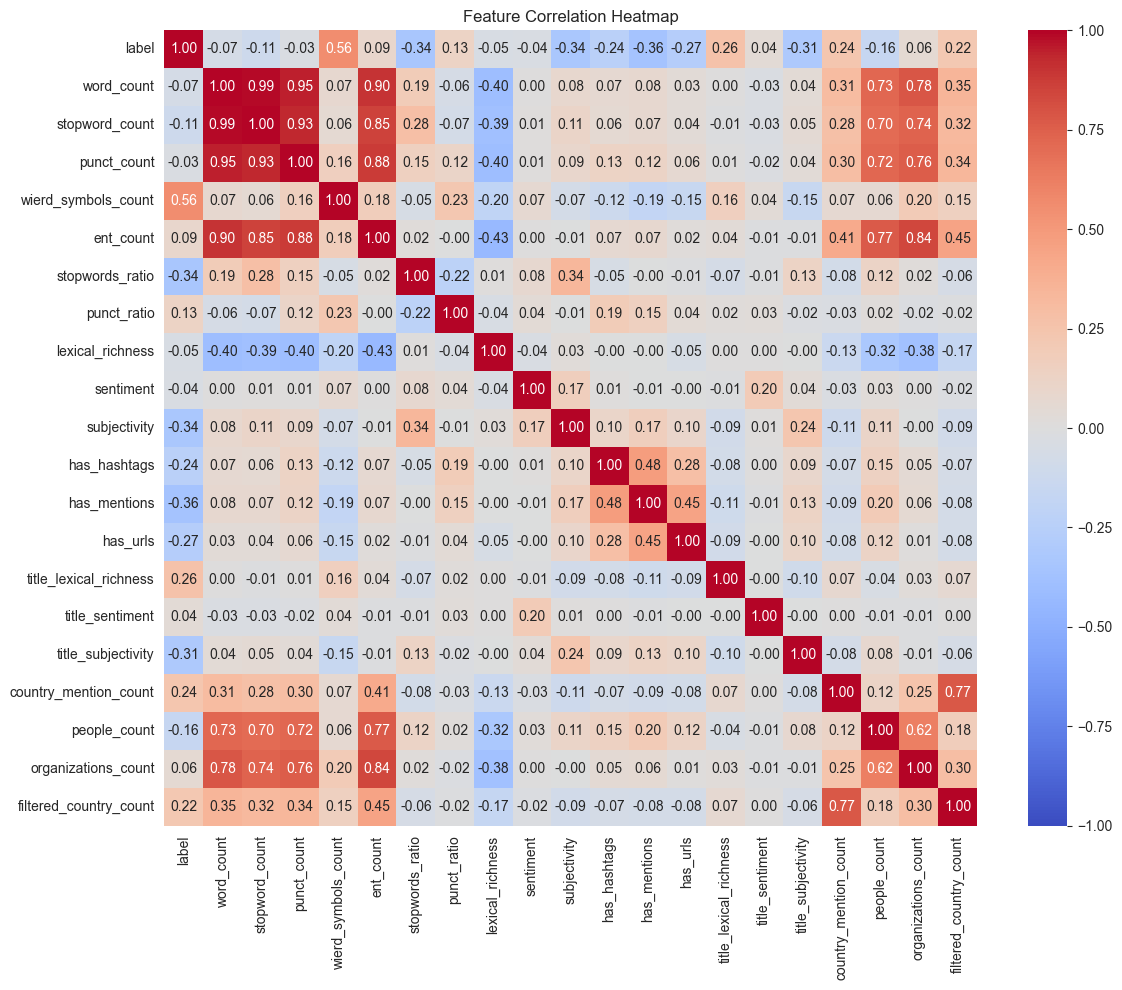

In [47]:
import pandas as pd

exclude_columns = [
    'text', 'subject', 'date', 'hashtags', 'mentions', 'urls', 
    'hashtag_count', 'mention_count', 'url_count', 'people_ent', 
    'organizations_ent', 'mentioned_countries', 'filtered_countries'
]

# Select only numeric columns and exclude the unwanted ones
numeric_columns = df.select_dtypes(include=['number']).columns
columns_to_analyze = [col for col in numeric_columns if col not in exclude_columns]

# Compute correlation matrix for the selected columns
correlation_matrix = df[columns_to_analyze].corr()

# Display the correlation matrix
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


 **wierd_symbols_count** (0.561) turi stiprią teigiamą koreliaciją su `label`, **subjectivity** (-0.336) ir **has_mentions** (-0.362) turi vidutinę neigiamą koreliaciją, todėl subjektyvūs tekstai bei tekstai su paminėjimais greičiau siejami su melagingomis naujienomis. Tuo tarpu **country_mention_count** (0.237) ir **title_lexical_richness** (0.261) silpnai teigiamai koreliuoja su true news. Tarp **word_count**, **stopword_count** ir **punct_count** (>0.95), taip pat tarp **people_count** ir **organizations_count** (0.624) pastebėta stipri koreliacija, todėl geriau būtų šiuos features apjungti ar pašalinti. **sentiment** (-0.035) turi itin silpną koreliaciją su `label`, todėl galėtume pašalinti.

In [48]:
# Apjungiame title_subjectivity ir subjectivity

df['overall_subjectivity'] = (df['subjectivity'] + df['title_subjectivity']) / 2


                           label  wierd_symbols_count  stopwords_ratio  \
label                   1.000000             0.561312        -0.341643   
wierd_symbols_count     0.561312             1.000000        -0.051597   
stopwords_ratio        -0.341643            -0.051597         1.000000   
has_mentions           -0.361835            -0.187014        -0.003097   
has_urls               -0.272138            -0.154338        -0.013947   
title_lexical_richness  0.260923             0.157388        -0.067362   
overall_subjectivity   -0.379744            -0.156412         0.226630   
country_mention_count   0.237242             0.066421        -0.081970   

                        has_mentions  has_urls  title_lexical_richness  \
label                      -0.361835 -0.272138                0.260923   
wierd_symbols_count        -0.187014 -0.154338                0.157388   
stopwords_ratio            -0.003097 -0.013947               -0.067362   
has_mentions                1.000000 

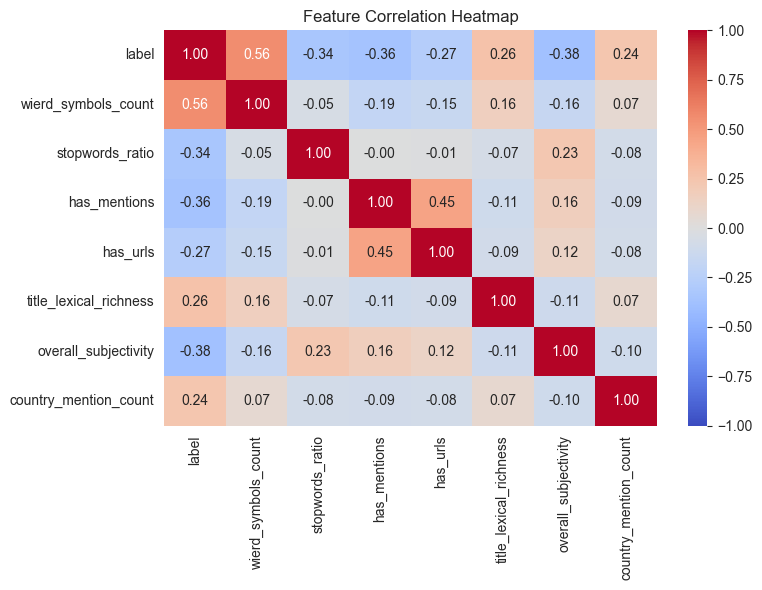

In [55]:
# List of selected features for model prediction
selected_features = [
    'label',
    'wierd_symbols_count',
    'stopwords_ratio',
    'has_mentions',
    'has_urls',
    'title_lexical_richness',
    'overall_subjectivity',
    'country_mention_count'
]

# Filter the DataFrame to keep only the selected features
df_filtered = df[selected_features]

correlation_matrix = df_filtered.corr()

print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()



In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# For text
X_text = df['text']
y = df['label']

# For features
X_features = df_filtered.drop(columns=['label'])
y_features = df_filtered['label']

# Train-test split for text
X_text_train, X_text_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42)

# Train-test split for features
X_feat_train, X_feat_test, y_feat_train, y_feat_test = train_test_split(X_features, y_features, test_size=0.3, random_state=42)


# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 most important words
X_text_train_tfidf = vectorizer.fit_transform(X_text_train)
X_text_test_tfidf = vectorizer.transform(X_text_test)


In [51]:
# Logistic Regression for text
logistic_text = LogisticRegression(max_iter=1000)
logistic_text.fit(X_text_train_tfidf, y_train)
y_pred_text_log = logistic_text.predict(X_text_test_tfidf)
print("Logistic Regression (Text) Accuracy:", accuracy_score(y_test, y_pred_text_log))
print(classification_report(y_test, y_pred_text_log))

# Logistic Regression for features
logistic_features = LogisticRegression(max_iter=1000)
logistic_features.fit(X_feat_train, y_feat_train)
y_pred_features_log = logistic_features.predict(X_feat_test)
print("Logistic Regression (Features) Accuracy:", accuracy_score(y_feat_test, y_pred_features_log))
print(classification_report(y_feat_test, y_pred_features_log))


Logistic Regression (Text) Accuracy: 0.9847903019350952
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6809
           1       0.98      0.99      0.98      6472

    accuracy                           0.98     13281
   macro avg       0.98      0.98      0.98     13281
weighted avg       0.98      0.98      0.98     13281

Logistic Regression (Features) Accuracy: 0.8939838867555154
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6809
           1       0.90      0.88      0.89      6472

    accuracy                           0.89     13281
   macro avg       0.89      0.89      0.89     13281
weighted avg       0.89      0.89      0.89     13281



In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

svm_text = SVC(kernel='linear', random_state=42)
svm_text.fit(X_text_train_tfidf, y_train)

# Predictions for both train and test sets
y_train_pred_text_svm = svm_text.predict(X_text_train_tfidf)
y_test_pred_text_svm = svm_text.predict(X_text_test_tfidf)

# Confusion matrix
conf_matrix_train_text = confusion_matrix(y_train, y_train_pred_text_svm)
conf_matrix_test_text = confusion_matrix(y_test, y_test_pred_text_svm)

conf_matrix_train_text
conf_matrix_test_text

# Classification reports
print("Classification Report - SVM (Text) - Train Data:")
print(classification_report(y_train, y_train_pred_text_svm))

print("Classification Report - SVM (Text) - Test Data:")
print(classification_report(y_test, y_test_pred_text_svm))

Classification Report - SVM (Text) - Train Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16042
           1       0.99      0.99      0.99     14944

    accuracy                           0.99     30986
   macro avg       0.99      0.99      0.99     30986
weighted avg       0.99      0.99      0.99     30986

Classification Report - SVM (Text) - Test Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6809
           1       0.99      0.99      0.99      6472

    accuracy                           0.99     13281
   macro avg       0.99      0.99      0.99     13281
weighted avg       0.99      0.99      0.99     13281



In [53]:
# SVM for features
svm_features = SVC(kernel='linear')
svm_features.fit(X_feat_train, y_feat_train)
y_pred_features_svm = svm_features.predict(X_feat_test)
print("SVM (Features) Accuracy:", accuracy_score(y_feat_test, y_pred_features_svm))
print(classification_report(y_feat_test, y_pred_features_svm))


SVM (Features) Accuracy: 0.8947368421052632
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      6809
           1       0.90      0.89      0.89      6472

    accuracy                           0.89     13281
   macro avg       0.89      0.89      0.89     13281
weighted avg       0.89      0.89      0.89     13281



In [54]:
# Normalize features for KNN
scaler = StandardScaler()
X_feat_train_scaled = scaler.fit_transform(X_feat_train)
X_feat_test_scaled = scaler.transform(X_feat_test)

# KNN for text (TF-IDF is already scaled)
knn_text = KNeighborsClassifier(n_neighbors=5)
knn_text.fit(X_text_train_tfidf, y_train)
y_pred_text_knn = knn_text.predict(X_text_test_tfidf)
print("KNN (Text) Accuracy:", accuracy_score(y_test, y_pred_text_knn))
print(classification_report(y_test, y_pred_text_knn))

# KNN for features
knn_features = KNeighborsClassifier(n_neighbors=5)
knn_features.fit(X_feat_train_scaled, y_feat_train)
y_pred_features_knn = knn_features.predict(X_feat_test_scaled)
print("KNN (Features) Accuracy:", accuracy_score(y_feat_test, y_pred_features_knn))
print(classification_report(y_feat_test, y_pred_features_knn))


KNN (Text) Accuracy: 0.855131390708531
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      6809
           1       0.88      0.82      0.85      6472

    accuracy                           0.86     13281
   macro avg       0.86      0.85      0.85     13281
weighted avg       0.86      0.86      0.85     13281

KNN (Features) Accuracy: 0.9067841277012273
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6809
           1       0.91      0.90      0.90      6472

    accuracy                           0.91     13281
   macro avg       0.91      0.91      0.91     13281
weighted avg       0.91      0.91      0.91     13281

